![](../nci-logo.png)

-------
# Data Access and Manipulation Using iPython Notebooks
## Geophysics National Coverages Example



### In this notebook:

- Using iPython Notebooks with NetCDF data within the VDI
    - <a href='#part1'>Launch Jupyter Notebook</a>  
    - <a href='#part2'>Importing Python libraries</a>  
    - <a href='#part3'>Opening/reading a file</a> 
    - <a href='#part4'>Browsing information about file contents</a> 
    - <a href='#part5'>Extracting and visualising data</a>
    - <a href='#part6'>Extracting data based on geospatial criteria</a>
    - <a href='#part7'>Plotting data along transects</a>

   
#### The following material uses Geoscience Australia's National Coverages Geophysics Data Collection which is available under the Create Commons License 4.0.  

---------

<br>


<a id='part1'></a> 
## Launch the Jupyter Notebook application

#### Using pre-built VDI modules:

Load the `python`, `ipython`, and `netcdf4-python` modules:

```
    $ module load python/2.7.11
    $ module load python/2.7.11-matplotlib
    $ module load ipython/4.2.0-py2.7
    $ module load netcdf4-python/1.2.4-ncdf-4.3.3.1-py2.7
```    
    
<br>
Launch the Jupyter Notebook application:
```
    $ jupyter notebook
``` 

<div class="alert alert-info">
<b>NOTE: </b> This will launch the <b>Notebook Dashboard</b> within a new web browser window. 
</div>

<br>

#### Using virtual environments:

To use along with customised python packages in a virtual environment, begin by following the steps in **Python on the VDI: Part II**. 

Once you have a virtual environment setup with your packages (including `Jupyter`), proceed by loading the required modules and activating the virtual environment:

```
    $ module load python/2.7.11
    $ source <path_to_virtual_environment>/bin/activate
```

<br>
Then, as above, launch the Jupyter Notebook application:

```
    $ jupyter notebook
```    
    
<div class="alert alert-warning">
<b>NOTE: </b> If you have already followed <b>Python on the VDI: Part II</b>, you should have installed the netcdf4-python package, which is required in the remainder of this notebook.  
</div>

<br>


<br>


<a id='part2'></a> 
## Import python libraries

There are several Python libraries available to work with netCDF and HDF file formats. This tutorial will use `netCDF4` but others, such as `h5py`, `cdms2`, and `gdal` can also be used. 



In [3]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt 
%matplotlib inline

ImportError: No module named netCDF4

<a id='part3'></a> 
## Open/read file


### The `Dataset` function is used to open a file with Python's netCDF4 library. 
For local files, this will be the filepath (i.e., /g/data...) while for remote access, this will be the OPeNDAP data URL. Note that this does not yet load/extract any data, just opens the file.

#### 1. Accessing data locally (/g/data) 

In [2]:
path = '/g/data1/rr2/National_Coverages/IR_gravity_anomaly_Australia_V1/IR_gravity_anomaly_Australia_V1.nc'

#### 2. Accessing data remotely (OPeNDAP)

In [1]:
url = 'http://dapds00.nci.org.au/thredds/dodsC/rr2/National_Coverages/IR_gravity_anomaly_Australia_V1/IR_gravity_anomaly_Australia_V1.nc'

#### 3. Either the 'path' or the 'url' can be used now to open the file 
Comment/uncomment the access method you would like to use here.

In [2]:
# f = Dataset(path, 'r')

# OR

f = Dataset(url, 'r')

NameError: name 'Dataset' is not defined

#### After opening the file with the OPeNDAP address, the file can be handled in the same manner as a local file. 

<a id='part4'></a> 
## Browse information about the file

### File dimensions

In [5]:
for item in f.dimensions:
    print f.dimensions[item].name, f.dimensions[item].size

lat 4182
lon 5717
maxStrlen64 64


### File variables

In [6]:
vars = f.variables.keys()
for item in vars:
    print 'Variable: \t', item
    print 'Dimensions: \t', f[item].dimensions
    print 'Shape:    \t', f[item].shape, '\n'

Variable: 	lat
Dimensions: 	(u'lat',)
Shape:    	(4182,) 

Variable: 	lon
Dimensions: 	(u'lon',)
Shape:    	(5717,) 

Variable: 	crs
Dimensions: 	(u'maxStrlen64',)
Shape:    	(64,) 

Variable: 	grav_ir_anomaly
Dimensions: 	(u'lat', u'lon')
Shape:    	(4182, 5717) 



<a id='part5'></a>
## Extracting data (using index values)
A nice feature of netCDF/HDF file formats is that you can extract subsets without having to read the entire file (or variable). The example below demonstrates the simplest subsetting example by directly specifying the subset indices. 

In [7]:
# Read variables (but not yet extract)
grav = f['grav_ir_anomaly']
lat = f['lat']
lon = f['lon']

### Plot data (extracting all data in this example)

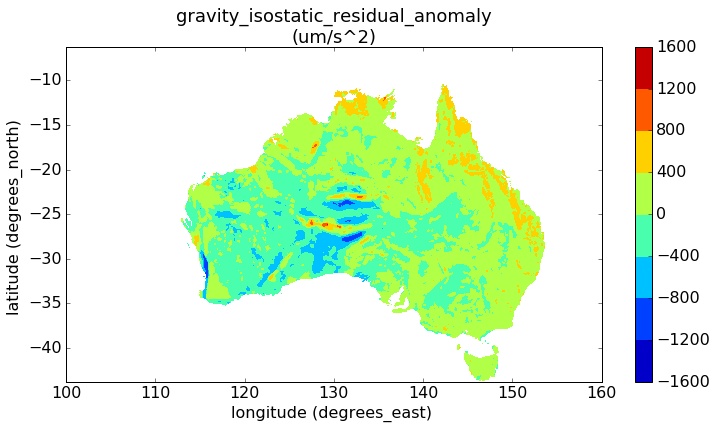

In [8]:
# Set figure size
plt.figure(figsize=(12,6))

# Plot data subset with equal axes and colorbar
plt.contourf(lon[:], lat[:], grav[:,:])
plt.axis('equal')
cbar = plt.colorbar()

# Add figure title and labels
# We can make use of the defined variable attributes to do this
plt.title(grav.long_name+'\n'+'('+grav.units+')', fontsize=18)
plt.xlabel(lon.long_name+' ('+ lon.units +') ', fontsize=16)
plt.ylabel(lat.long_name+' ('+ lat.units +') ', fontsize=16)

# Adjust tick mark size
cbar.ax.tick_params(labelsize=16) 
plt.tick_params(labelsize=16)


<a id='part6'></a> 
## Geospatial search and subset

### Define geospatial criteria and extract subset

In [9]:
# Define the spatial criteria 
lonCriteria = (lon[:] < 150) & (lon[:] > 140)
latCriteria = (lat[:] < -39) & (lat[:] > -45)

In [10]:
# Extract
lon_subset = lon[lonCriteria]
lat_subset = lat[latCriteria]
grav_subset = grav[latCriteria, lonCriteria]

### Plot

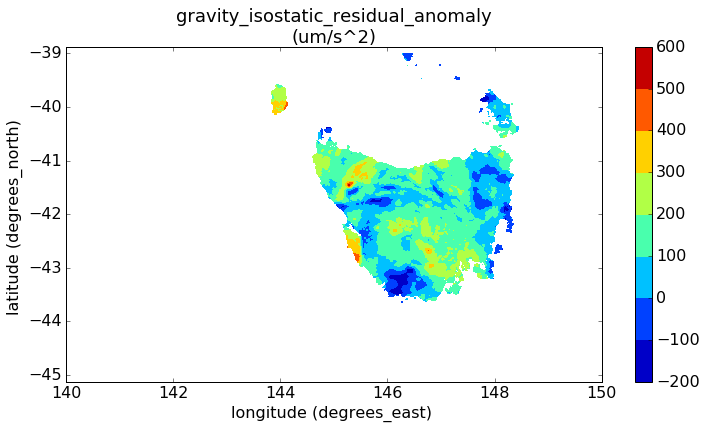

In [11]:
# Set figure size
plt.figure(figsize=(12,6))

# Plot data subset with equal axes and colorbar
plt.contourf(lon_subset, lat_subset, grav_subset)
plt.axis('equal')
cbar = plt.colorbar()

# Add figure title and labels
# We can make use of the defined variable attributes to do this
plt.title(grav.long_name+'\n'+'('+grav.units+')', fontsize=18)
plt.xlabel(lon.long_name+' ('+ lon.units +') ', fontsize=16)
plt.ylabel(lat.long_name+' ('+ lat.units +') ', fontsize=16)

# Adjust tick mark size
cbar.ax.tick_params(labelsize=16) 
plt.tick_params(labelsize=16)


<a id='part7'></a> 
## Plot data along transect lines

### Extract data along lat, lon lines

In [12]:
line1 = -41.45
ii = abs(lat_subset[:] - line1) < .001

line2 = 146.8
jj = abs(lon_subset[:] - line2) < .004

In [13]:
grav_line1 = grav_subset[ii,:]
grav_line2 = grav_subset[:,jj]

### Plot transects

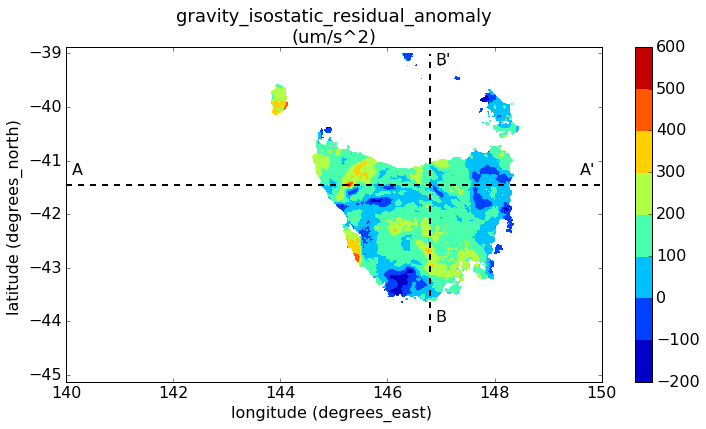

In [20]:
# Set figure size
plt.figure(figsize=(12,6))

# Plot data subset with equal axes and colorbar
plt.contourf(lon_subset, lat_subset, grav_subset)
plt.axis('equal')
cbar = plt.colorbar()

# Add transect line
plt.plot([lon_subset.min(), lon_subset.max()], 
         [lat_subset[ii], lat_subset[ii]], 
         '--k', lw=2)
plt.text(lon_subset.min()+.1, lat_subset[ii]+.2, "A", fontsize=16)
plt.text(lon_subset.max()-.4, lat_subset[ii]+.2, "A'", fontsize=16)

plt.plot([lon_subset[jj], lon_subset[jj]], 
         [lat_subset.min(), lat_subset.max()], 
         '--k', lw=2)
plt.text(lon_subset[jj]+.1, lat_subset.min()+.2, "B", fontsize=16)
plt.text(lon_subset[jj]+.1, lat_subset.max()-.2, "B'", fontsize=16)



# Add figure title and labels
# We can make use of the defined variable attributes to do this
plt.title(grav.long_name+'\n'+'('+grav.units+')', fontsize=18)
plt.xlabel(lon.long_name+' ('+ lon.units +') ', fontsize=16)
plt.ylabel(lat.long_name+' ('+ lat.units +') ', fontsize=16)

# Adjust tick mark size
cbar.ax.tick_params(labelsize=16) 
plt.tick_params(labelsize=16)


### Plot data along transect lines

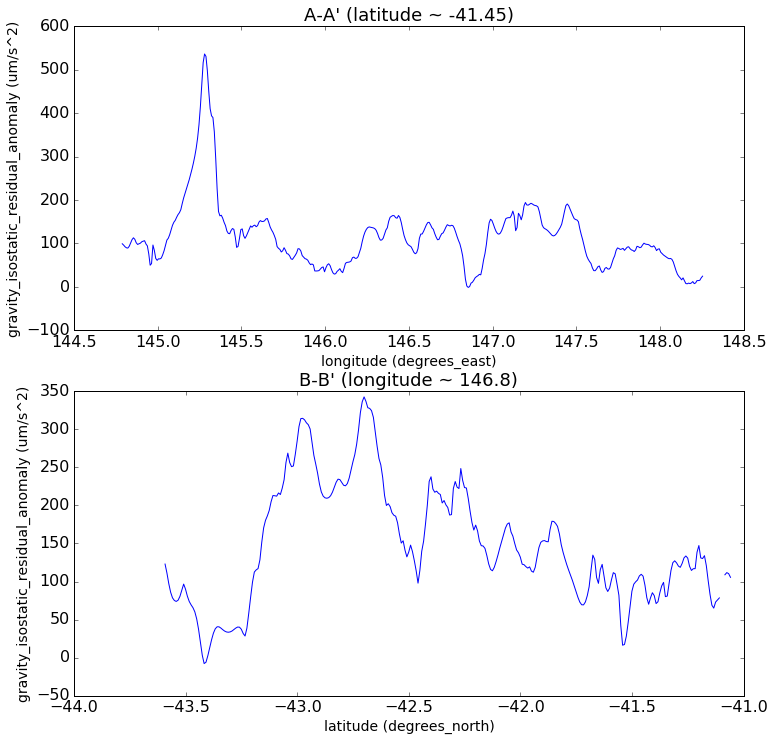

In [22]:
# Set figure size
plt.figure(figsize=(12,12))

# A-A'
plt.subplot(211)
plt.title("A-A' (latitude ~ "+str(line1)+")", fontsize=18)
plt.plot(lon_subset, grav_line1[0,:])
plt.xlabel("longitude ("+lon.units+")", fontsize=14)
plt.ylabel(grav.long_name+" ("+grav.units+")", fontsize=14)
plt.tick_params(labelsize=16)



# B-B'
plt.subplot(212)
plt.title("B-B' (longitude ~ "+str(line2)+")", fontsize=18)
plt.plot(lat_subset, grav_line2[:,0])
plt.xlabel("latitude ("+lat.units+")", fontsize=14)
plt.ylabel(grav.long_name+" ("+grav.units+")", fontsize=14)
plt.tick_params(labelsize=16)


### Close the file once finished

In [23]:
f.close()

<div class="alert alert-info">
<b>EXTRA: </b> Add the "%%time" magic function to the beginning of cells and run through the above examples once for remote data access with the OPeNDAP Data URL and again for direct access on the file system. 
</div>